In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
data=load_iris()
Data=data['data']
outputs=data['target']
outputsNames= data['target_names']
featureNames= list(data['feature_names'])
labelNames=list(outputsNames)



feature1=[float(feat[featureNames.index('sepal length (cm)')]) for feat in Data]
feature2=[float(feat[featureNames.index('sepal width (cm)')]) for feat in Data]
feature3=[float(feat[featureNames.index('petal length (cm)')]) for feat in Data]
feature4=[float(feat[featureNames.index('petal width (cm)')]) for feat in Data]
inputs=[[f1,f2,f3,f4] for f1,f2,f3,f4 in zip(feature1,feature2,feature3,feature4)]


In [3]:
from mpl_toolkits.mplot3d import Axes3D

def plotClassification(feature1,feature2,feature3,feature4,title=None):
    markers=['o','^','>']
    labels= list(set(outputs))
    cmap=['hot','Greens','Purples']
    noData=len(feature1)
    fig= plt.figure(figsize=(20,10))
    j=0
    ax= fig.add_subplot(111,projection='3d')
    for crtLabel in labels:
        x=[feature1[i] for i in range(noData) if outputs[i]==crtLabel]
        y=[feature2[i] for i in range(noData) if outputs[i]==crtLabel]
        z=[feature3[i] for i in range(noData) if outputs[i]==crtLabel]
        c=[feature4[i] for i in range(noData) if outputs[i]==crtLabel]
        
        imag= ax.scatter(x,y,z,c=c,cmap=cmap[j],label=labelNames[crtLabel],marker=markers[j],s=90)
        fig.colorbar(imag)

        j+=1
    plt.legend()
    plt.title(title)
    plt.show()
        

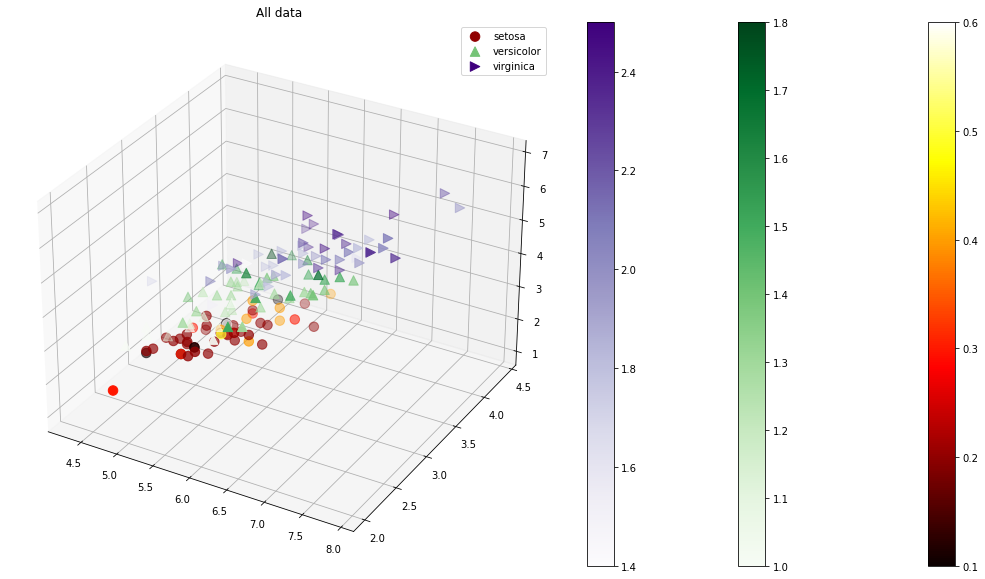

In [4]:
plotClassification(feature1,feature2,feature3,feature4,'All data')

In [5]:

np.random.seed(5)

indexes=[i for i in range(len(Data))]
trainSamples=np.random.choice(indexes,int(0.8*len(indexes)),replace=False)
testSamples=[i for i in indexes if not i in trainSamples]

feature1_train=[inputs[i][0] for i in trainSamples]
feature2_train=[inputs[i][1] for i in trainSamples]
feature3_train=[inputs[i][2] for i in trainSamples]
feature4_train=[inputs[i][3] for i in trainSamples]

trainOutputs=[outputs[i] for i in trainSamples]


feature1_test=[inputs[i][0] for i in testSamples]
feature2_test=[inputs[i][1] for i in testSamples]
feature3_test=[inputs[i][2] for i in testSamples]
feature4_test=[inputs[i][3] for i in testSamples]

testOutputs=[outputs[i] for i in testSamples]

In [6]:

from sklearn.preprocessing import StandardScaler

def normalisation(trainInputs,testInputs):
    
    scaler=StandardScaler()
    if not isinstance(trainInputs[0],list):
        trainInputs=[[el] for el in trainInputs]
        testInputs=[[el] for el in testInputs]
        
        scaler.fit(trainInputs)
        
        normalisedTrainInputs=scaler.transform(trainInputs)
        normalisedTestInputs=scaler.transform(testInputs)
        
        normalisedTrainInputs=[el[0] for el in normalisedTrainInputs]
        normalisedTestInputs=[el[0] for el in normalisedTestInputs]
    else:
        scaler.fit(trainInputs)
        normalisedTrainInputs=scaler.transform(trainInputs)
        normalisedTestInputs=scaler.transform(testInputs)
        
    return normalisedTrainInputs,normalisedTestInputs

        

In [7]:

def normalisation_score01(feature):
    val_min=min(feature)
    val_max=max(feature)
    
    return [ (feat- val_min)/(val_max- val_min) for feat in feature]

In [8]:

features1_train_n= normalisation_score01(feature1_train)
features2_train_n= normalisation_score01(feature2_train)
features3_train_n= normalisation_score01(feature3_train)
features4_train_n= normalisation_score01(feature4_train)

features1_test_n= normalisation_score01(feature1_test)
features2_test_n= normalisation_score01(feature2_test)
features3_test_n= normalisation_score01(feature3_test)
features4_test_n= normalisation_score01(feature4_test)


trainInputs=[[f1,f2,f3,f4] for f1,f2,f3,f4 in zip(features1_train_n,features2_train_n,features3_train_n,features4_train_n)]
testInputs=[[f1,f2,f3,f4] for f1,f2,f3,f4 in zip(features1_test_n,features2_test_n,features3_test_n,features4_test_n)]

In [9]:
from sklearn import linear_model
from MyLogisticRegression import MyLogisticRegression

regressor_1= linear_model.LogisticRegression()
regressor_2=MyLogisticRegression()

regressor_3=MyLogisticRegression()
regressor_4=MyLogisticRegression()

trainOutputs_1= [1 if trainOutputs[i]==0 else 0 for i in range(len(trainOutputs))]
trainOutputs_2= [1 if trainOutputs[i]==1 else 0 for i in range(len(trainOutputs))]
trainOutputs_3= [1 if trainOutputs[i]==2 else 0 for i in range(len(trainOutputs))]

regressor_2.fit(trainInputs,trainOutputs_1)
regressor_3.fit(trainInputs,trainOutputs_2)
regressor_4.fit(trainInputs,trainOutputs_3)

print("First Model: f(x)= ", regressor_2.intercept_," + ", regressor_2.coef_[0]," * x1 + ",regressor_2.coef_[1]," * x2 + ",regressor_2.coef_[2]," * x3 + ",regressor_2.coef_[3]," * x4")
print("Second Model: f(x)= ", regressor_3.intercept_," + ", regressor_3.coef_[0]," * x1 + ",regressor_3.coef_[1]," * x2 + ",regressor_3.coef_[2]," * x3 + ",regressor_3.coef_[3]," * x4")
print("Third Model: f(x)= ", regressor_4.intercept_," + ", regressor_4.coef_[0]," * x1 + ",regressor_4.coef_[1]," * x2 + ",regressor_4.coef_[2]," * x3 + ",regressor_4.coef_[3]," * x4")


w0_1=regressor_2.intercept_
w1_1=regressor_2.coef_[0]
w2_1=regressor_2.coef_[1]
w3_1=regressor_2.coef_[2]
w4_1=regressor_2.coef_[3]

w0_2=regressor_3.intercept_
w1_2=regressor_3.coef_[0]
w2_2=regressor_3.coef_[1]
w3_2=regressor_3.coef_[2]
w4_2=regressor_3.coef_[3]

w0_3=regressor_4.intercept_
w1_3=regressor_4.coef_[0]
w2_3=regressor_4.coef_[1]
w3_3=regressor_4.coef_[2]
w4_3=regressor_4.coef_[3]

First Model: f(x)=  3.660202674952438  +  -4.399641874641758  * x1 +  10.037542684965057  * x2 +  -12.207366458947742  * x3 +  -11.654010849184564  * x4
Second Model: f(x)=  2.1758839811788464  +  -1.9058461064133607  * x1 +  -7.692121477617049  * x2 +  7.418713882273896  * x3 +  -6.0118360537126865  * x4
Third Model: f(x)=  -23.75704932633221  +  -3.1136307407900734  * x1 +  -7.713098654893956  * x2 +  20.08816322981969  * x3 +  21.92274423270241  * x4


In [10]:
computedOutputs_1=[w0_1+w1_1*x[0]+w2_1*x[1]+w3_1*x[2]+w4_1*x[3] for x in testInputs]
computedOutputs_2=[w0_2+w1_2*x[0]+w2_2*x[1]+w3_2*x[2]+w4_2*x[3] for x in testInputs]
computedOutputs_3=[w0_3+w1_3*x[0]+w2_3*x[1]+w3_3*x[2]+w4_3*x[3] for x in testInputs]

computedOutputs=[]
for c1,c2,c3 in zip(computedOutputs_1,computedOutputs_2,computedOutputs_3):
    if c1>c2 and c1>c3:
        computedOutputs.append(0)
    elif c2>c1 and c2>c3:
        computedOutputs.append(1)
    elif c3>c1 and c3>c2:
        computedOutputs.append(2)
        

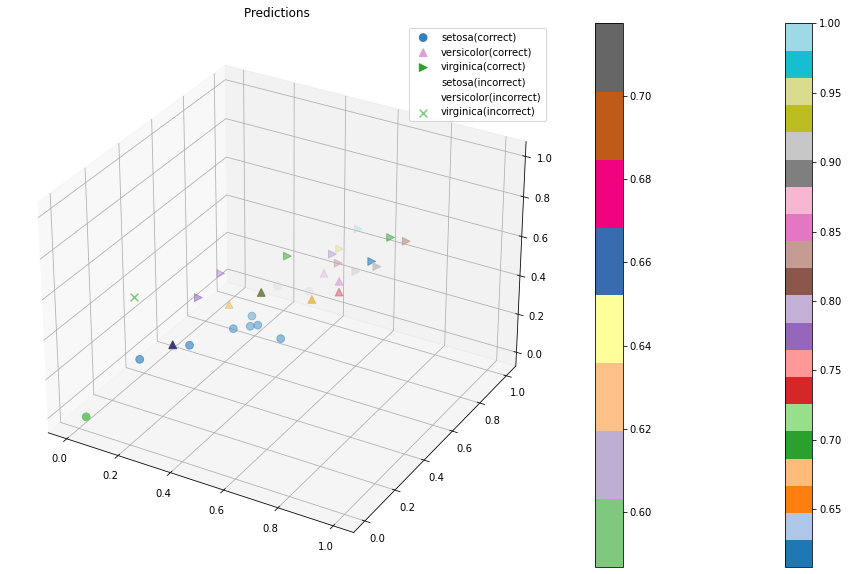

In [11]:
def plotClassificationPrediction(feature1,feature2,feature3,feature4,computedOutputs,realOutputs,title='None'):
    labels=list(set(outputs))
    noData=len(feature1)
    fig= plt.figure(figsize=(20,10))
    markers=['o','^','>','h','H','x','X']
    cmaps=['tab20c','tab20b','tab20','Set1','Set2','Accent','Dark2']
    j=0
    ax= fig.add_subplot(111,projection='3d')
    for crtLabel in labels:
        x=[feature1[i] for i in range(noData) if realOutputs[i]==crtLabel and computedOutputs[i]== crtLabel]
        y=[feature2[i] for i in range(noData) if realOutputs[i]==crtLabel and computedOutputs[i]== crtLabel]
        z=[feature3[i] for i in range(noData) if realOutputs[i]==crtLabel and computedOutputs[i]== crtLabel]
        c=[feature4[i] for i in range(noData) if realOutputs[i]==crtLabel and computedOutputs[i]== crtLabel]
        imag= ax.scatter(x,y,z,c=c,cmap=cmaps[j],label= outputsNames[crtLabel]+ '(correct)',marker=markers[j],s=60)
        j+=1
    fig.colorbar(imag)
    for crtLabel in labels:
        x=[feature1[i] for i in range(noData) if realOutputs[i]==crtLabel and computedOutputs[i]!= crtLabel]
        y=[feature2[i] for i in range(noData) if realOutputs[i]==crtLabel and computedOutputs[i]!= crtLabel]
        z=[feature3[i] for i in range(noData) if realOutputs[i]==crtLabel and computedOutputs[i]!= crtLabel]
        c=[feature4[i] for i in range(noData) if realOutputs[i]==crtLabel and computedOutputs[i]!= crtLabel]
        imag=ax.scatter(x,y,z,c=c,cmap=cmaps[j],label= outputsNames[crtLabel]+'(incorrect)',marker=markers[j],s=60)
        j+=1
    
    fig.colorbar(imag)
    ax.set_title(title)
    ax.legend()
    plt.show()
    
        
plotClassificationPrediction(features1_test_n,features2_test_n,features3_test_n,features4_test_n,computedOutputs,testOutputs,'Predictions ')

In [12]:
from sklearn.metrics import mean_squared_error

def accuracy_error(computedOutputs,realOutputs):
    error=0.0
    
    for t1,t2 in zip(computedOutputs,realOutputs):
        if(t1!=t2):
            error+=1
    error/=len(computedOutputs)
    
    print("accuracy error(manual): ",error)
    
    error=mean_squared_error(realOutputs,computedOutputs)
    
    print("accuracy error(tool): ",error)

In [13]:
print("Accuracy Error: ")
accuracy_error(computedOutputs,testOutputs)

Accuracy Error: 
accuracy error(manual):  0.03333333333333333
accuracy error(tool):  0.03333333333333333
